In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
Data=pd.read_csv('../data/typing_dataset.csv')
print(Data.isnull().sum())
print(Data[Data['wpm']>70])
Optimized_Data=(Data[Data['wpm']<=70])
print(Optimized_Data.head())

prompt           0
wpm              0
avg_key_delay    0
total_chars      0
backspaces       0
accuracy         0
label            0
dtype: int64
                                 prompt        wpm  avg_key_delay  \
41  Keyboards differ in layout and feel  162447.49            0.0   

    total_chars  backspaces  accuracy  label  
41            0           0       0.0      0  
                                        prompt    wpm  avg_key_delay  \
0  The quick brown fox jumps over the lazy dog  31.55         360.54   
1          Stay focused and keep typing better  45.28         221.21   
2   Everyone starts as a beginner in something  23.61         382.22   
3     Never stop exploring new ideas and tools  47.14         212.58   
4          Python is an easy language to learn  39.86         280.81   

   total_chars  backspaces  accuracy  label  
0           47           5     95.56      0  
1           35           0    100.00      1  
2           47           5     92.13      0  
3   

Text(0, 0.5, 'Speed in wpm')

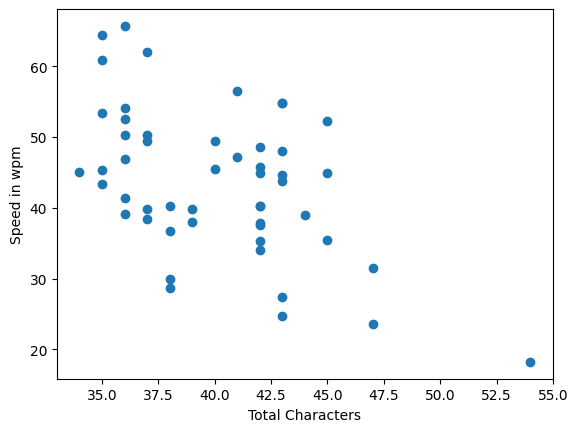

In [25]:
plt.scatter(Optimized_Data['total_chars'],Optimized_Data['wpm'])
plt.xlabel('Total Characters')
plt.ylabel('Speed in wpm')

Text(0, 0.5, 'Speed in wpm')

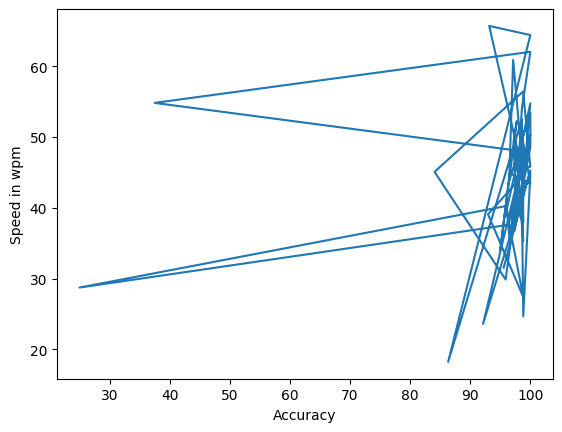

In [26]:
plt.plot(Optimized_Data['accuracy'],Optimized_Data['wpm'])
plt.xlabel('Accuracy')
plt.ylabel('Speed in wpm')

In [27]:
print(Optimized_Data['label'].value_counts())

label
1    30
0    21
Name: count, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split

X = Optimized_Data[['wpm', 'avg_key_delay', 'total_chars', 'backspaces', 'accuracy']]
y = Optimized_Data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 1.00
K-Nearest Neighbors Accuracy: 0.91
Decision Tree Accuracy: 1.00


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3 0]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [32]:
import joblib
joblib.dump(models["Logistic Regression"], '../models/typing_classifier.pkl')

['../models/typing_classifier.pkl']